In [2]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


11493376/11490434 [==============================] - 0s 0us/step


**Let's Plot the Noisy Images**

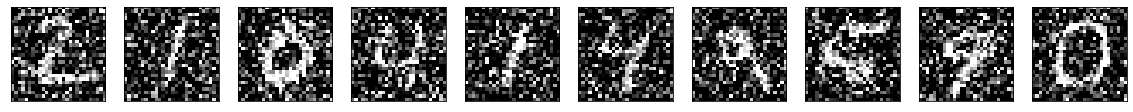

In [3]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [4]:
input_img = tf.keras.Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.Model(input_img, decoded, name='AutoEncoder')
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1699 - val_loss: 0.1166
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1126 - val_loss: 0.1080
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1074 - val_loss: 0.1049
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1047 - val_loss: 0.1031
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1027 - val_loss: 0.1010
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1012 - val_loss: 0.0997
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1001 - val_loss: 0.0986
Epoch 8/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0992 - val_loss: 0.0979
Epoch 9/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0985 - val_loss: 0.0974
Epoch 10/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0981 - val_lo

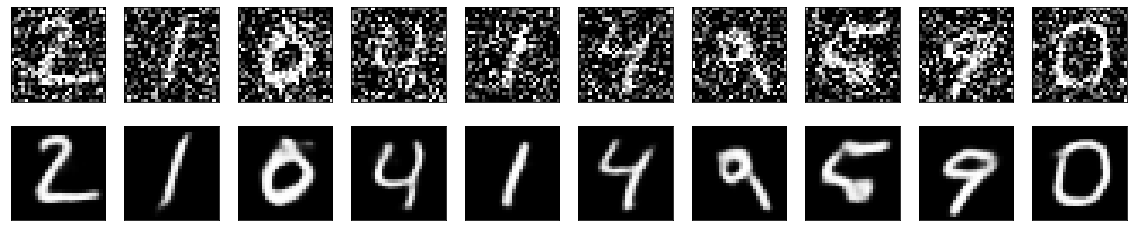

In [7]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
